In [29]:
#!jt -t monokai -T -N -kl
#!jt -r

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [31]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [32]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [33]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [34]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [35]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [36]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.yscale('symlog')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [37]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    for col in Important_countries:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [38]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,226,95521,16544,2607,18279,15447,3339,7993,12228,204,4110
2020-04-10,246,102534,18595,2767,18849,16081,3340,8974,13215,208,4232
2020-04-11,288,108511,20471,2736,19468,16606,3343,9892,13851,211,4357
2020-04-12,331,114100,22029,3022,19899,17209,3343,10629,14412,214,4474
2020-04-13,358,119491,23538,3194,20465,17756,3345,11347,14986,217,4585
2020-04-14,393,125995,25843,3294,21067,18056,3345,12129,15748,222,4683
2020-04-15,405,134189,28338,3804,21645,18708,3346,12894,17188,225,4777
2020-04-16,448,143814,32930,4052,22170,19315,3346,13759,17941,229,4869
2020-04-17,486,153835,36787,4352,22745,20002,4636,14607,18703,230,4958


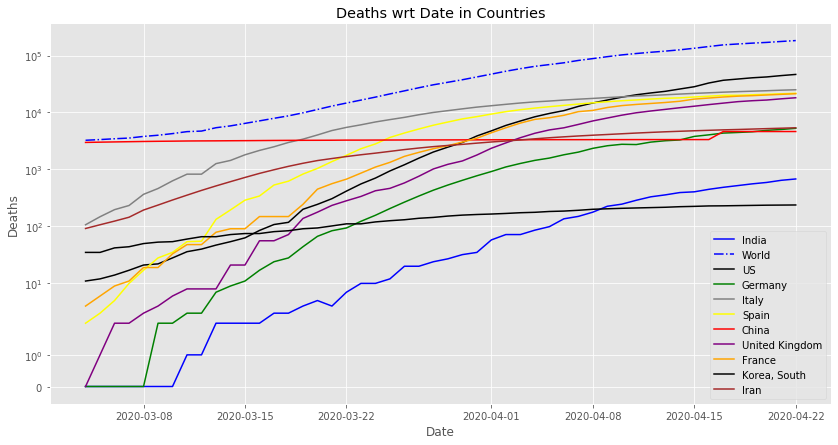

In [39]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

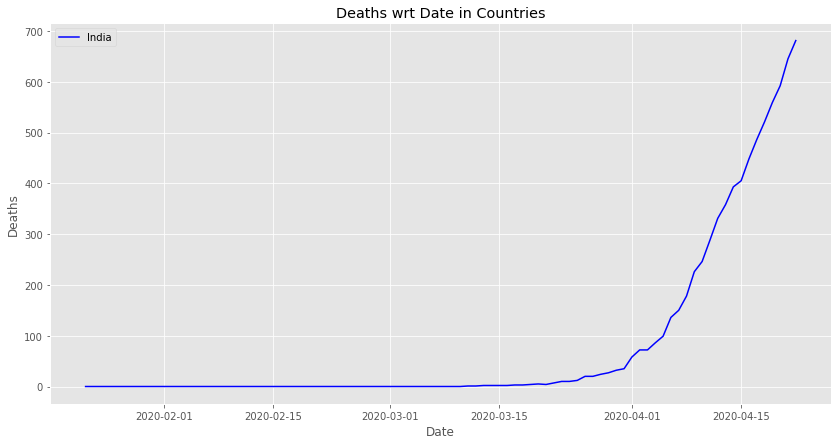

In [40]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

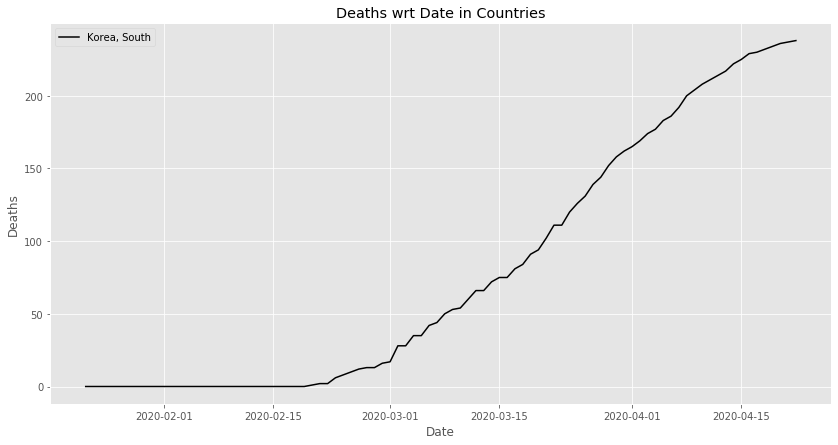

In [41]:
plotter(Deaths[['Korea, South']], 'Deaths', False)

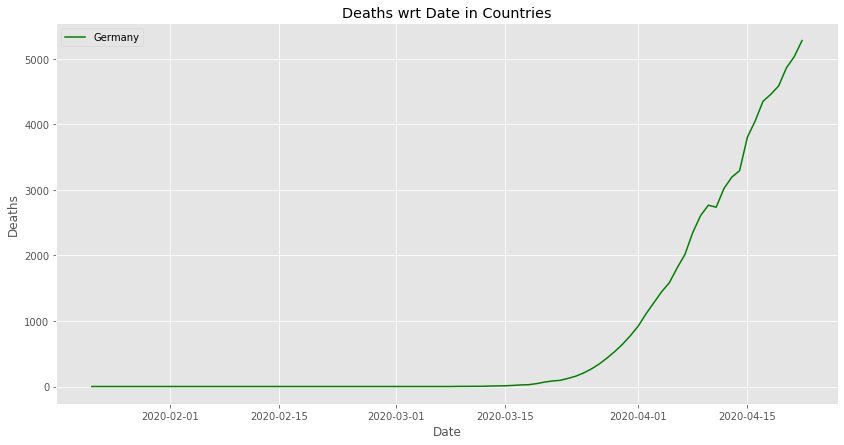

In [42]:
plotter(Deaths[['Germany']], 'Deaths', False)

In [43]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,11300,4776050,827200,130350,913950,772350,166950,399650,611400,10200,205500
2020-04-10,12300,5126700,929750,138350,942450,804050,167000,448700,660750,10400,211600
2020-04-11,14400,5425550,1023550,136800,973400,830300,167150,494600,692550,10550,217850
2020-04-12,16550,5705000,1101450,151100,994950,860450,167150,531450,720600,10700,223700
2020-04-13,17900,5974550,1176900,159700,1023250,887800,167250,567350,749300,10850,229250
2020-04-14,19650,6299750,1292150,164700,1053350,902800,167250,606450,787400,11100,234150
2020-04-15,20250,6709450,1416900,190200,1082250,935400,167300,644700,859400,11250,238850
2020-04-16,22400,7190700,1646500,202600,1108500,965750,167300,687950,897050,11450,243450
2020-04-17,24300,7691750,1839350,217600,1137250,1000100,231800,730350,935150,11500,247900


In [44]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,206,71551,15335,2340,10064,11082,48,7413,10530,73,1876
2020-04-10,226,75336,17014,2425,9715,10943,44,8213,11218,69,1854
2020-04-11,264,77859,18445,2303,9445,10624,44,8871,11534,67,1840
2020-04-12,304,80175,19562,2489,9120,10406,39,9398,11801,62,1834
2020-04-13,326,81909,20560,2549,8874,10040,37,9936,11956,59,1828
2020-04-14,358,83887,21969,2519,8639,9592,36,10336,12216,60,1785
2020-04-15,347,87006,23578,2884,8490,9321,30,10537,12774,60,1741
2020-04-16,376,90828,27001,2945,8255,8967,24,10833,12543,60,1709
2020-04-17,414,95045,29697,3077,8064,8804,1310,10996,12183,56,1664


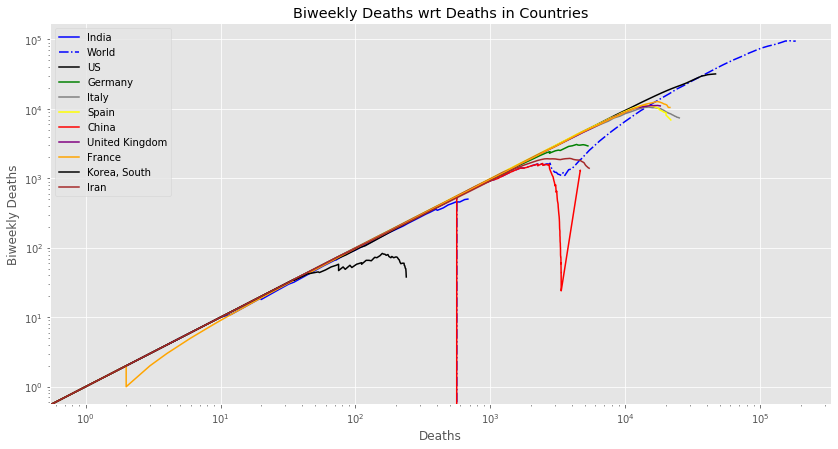

In [45]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

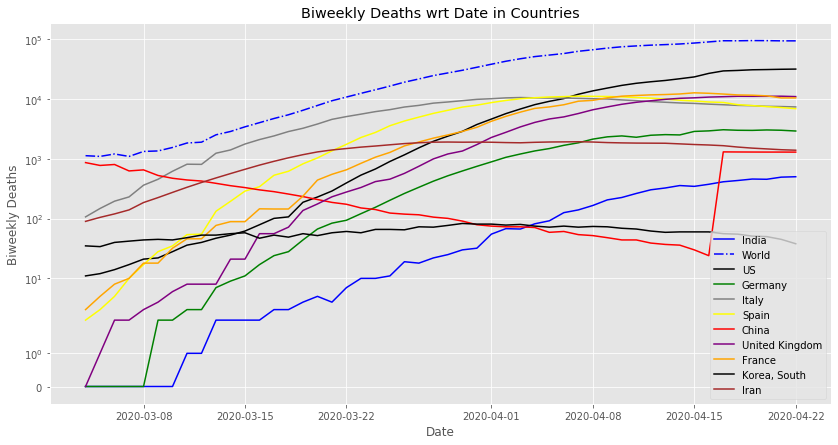

In [46]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths')

In [47]:
# daily increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,187,52301,14166,2076,2676,6772,-71,6841,8880,8,71
2020-04-10,208,53542,15480,2090,1847,5938,-72,7460,9300,-4,-10
2020-04-11,242,53026,16473,1879,863,4837,-62,7871,9308,-5,-66
2020-04-12,279,52690,17158,1967,150,3892,-62,8188,9281,-15,-82
2020-04-13,296,51453,17667,1921,-559,2666,-54,8581,9075,-24,-76
2020-04-14,326,49684,18203,1768,-1286,1661,-43,8599,8833,-21,-125
2020-04-15,292,48556,18936,1992,-1687,557,-45,8252,8509,-21,-160
2020-04-16,308,47709,21272,1882,-2255,-551,-49,8045,7389,-18,-167
2020-04-17,347,47554,22851,1869,-2585,-1351,1237,7563,6114,-24,-197


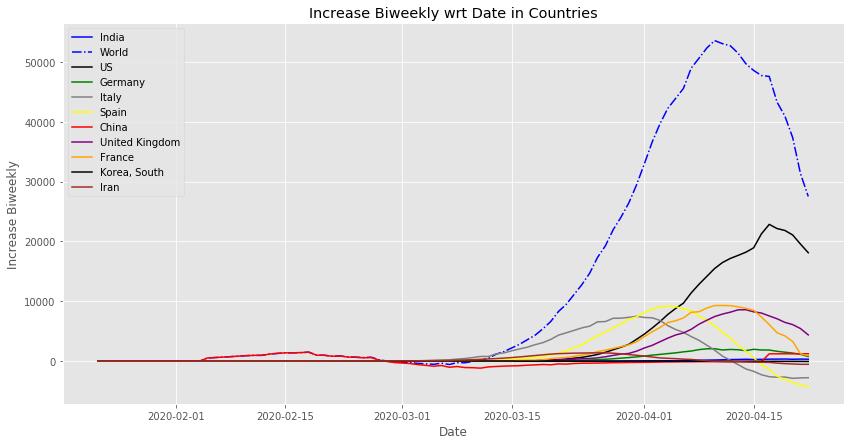

In [48]:
plotter(Increase_Biweekly, 'Increase Biweekly', False)

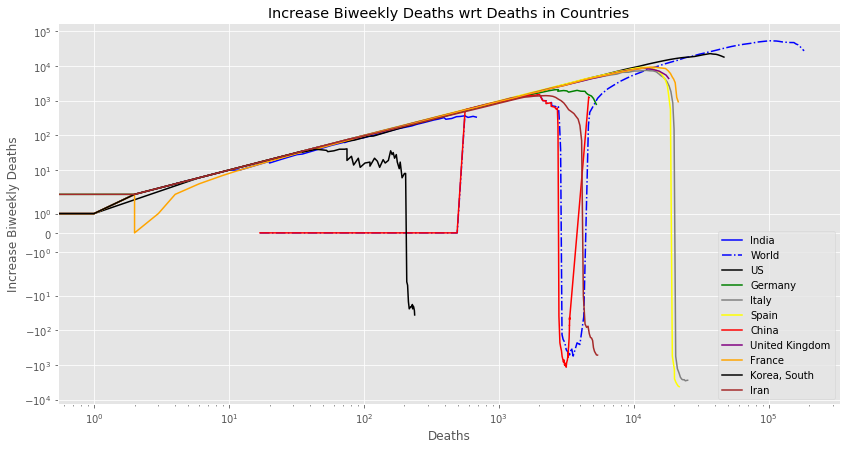

In [49]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [50]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,0.9078,0.7310,0.9238,0.8872,0.2659,0.6111,-1.4792,0.9228,0.8433,0.1096,0.0378
2020-04-10,0.9204,0.7107,0.9098,0.8619,0.1901,0.5426,-1.6364,0.9083,0.8290,-0.0580,-0.0054
2020-04-11,0.9167,0.6811,0.8931,0.8159,0.0914,0.4553,-1.4091,0.8873,0.8070,-0.0746,-0.0359
2020-04-12,0.9178,0.6572,0.8771,0.7903,0.0164,0.3740,-1.5897,0.8712,0.7865,-0.2419,-0.0447
2020-04-13,0.9080,0.6282,0.8593,0.7536,-0.0630,0.2655,-1.4595,0.8636,0.7590,-0.4068,-0.0416
2020-04-14,0.9106,0.5923,0.8286,0.7019,-0.1489,0.1732,-1.1944,0.8319,0.7231,-0.3500,-0.0700
2020-04-15,0.8415,0.5581,0.8031,0.6907,-0.1987,0.0598,-1.5000,0.7831,0.6661,-0.3500,-0.0919
2020-04-16,0.8191,0.5253,0.7878,0.6390,-0.2732,-0.0614,-2.0417,0.7426,0.5891,-0.3000,-0.0977
2020-04-17,0.8382,0.5003,0.7695,0.6074,-0.3206,-0.1535,0.9443,0.6878,0.5018,-0.4286,-0.1184


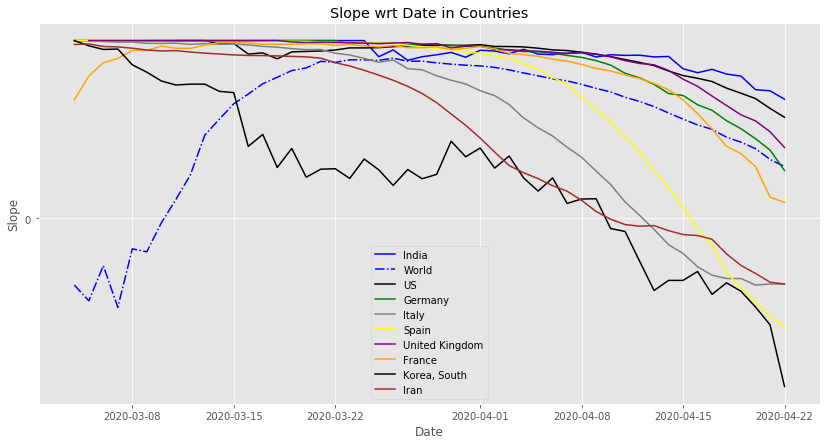

In [51]:
plotter(Slope[[c for c in Important_countries if c!= 'China']].tail(50), 'Slope', True)

In [52]:
Biweekly_Growth = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,10.8421,3.7169,13.1180,8.8636,1.3622,2.5712,0.4034,12.9598,6.3818,1.1231,1.0393
2020-04-10,12.5556,3.4567,11.0913,7.2388,1.2347,2.1864,0.3793,10.9070,5.8488,0.9452,0.9946
2020-04-11,12.0000,3.1353,9.3534,5.4316,1.1006,1.8358,0.4151,8.8710,5.1815,0.9306,0.9654
2020-04-12,12.1600,2.9170,8.1373,4.7682,1.0167,1.5975,0.3861,7.7669,4.6829,0.8052,0.9572
2020-04-13,10.8667,2.6894,7.1068,4.0589,0.9407,1.3615,0.4066,7.3328,4.1499,0.7108,0.9601
2020-04-14,11.1875,2.4526,5.8335,3.3542,0.8704,1.2094,0.4557,5.9505,3.6110,0.7407,0.9346
2020-04-15,6.3091,2.2628,5.0793,3.2332,0.8342,1.0636,0.4000,4.6114,2.9951,0.7407,0.9158
2020-04-16,5.5294,2.1064,4.7130,2.7705,0.7854,0.9421,0.3288,3.8856,2.4336,0.7692,0.9110
2020-04-17,6.1791,2.0013,4.3379,2.5472,0.7573,0.8670,17.9452,3.2030,2.0074,0.7000,0.8941


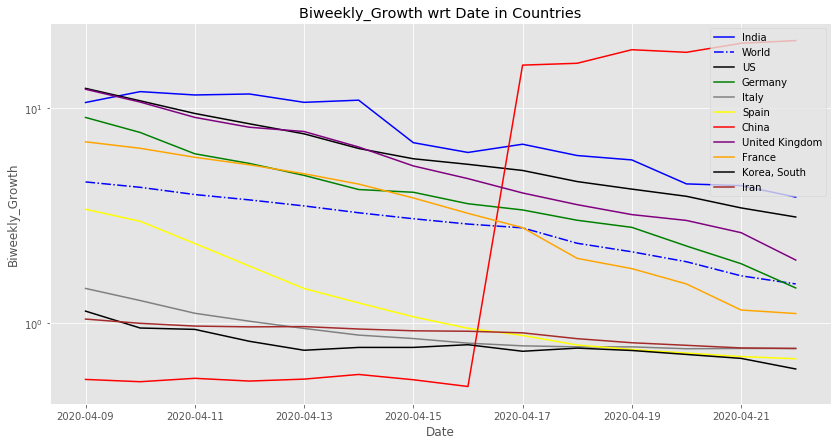

In [53]:
plotter(Biweekly_Growth[Important_countries].tail(14), 'Biweekly_Growth', True)

In [54]:
Confirmed = np.round(Removed * Biweekly_Growth)#.astype('int')
#Confirmed = Confirmed.tail(14).astype('int')
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,122516.0,17752100.0,10851210.0,1155370.0,1244983.0,1985866.0,67348.0,5179384.0,3901833.0,11456.0,213576.0
2020-04-10,154434.0,17721464.0,10312136.0,1001488.0,1163643.0,1757975.0,63343.0,4893971.0,3864595.0,9830.0,210457.0
2020-04-11,172800.0,17010727.0,9573673.0,743043.0,1071324.0,1524265.0,69384.0,4387597.0,3588448.0,9818.0,210312.0
2020-04-12,201248.0,16641485.0,8962829.0,720475.0,1011566.0,1374569.0,64537.0,4127719.0,3374498.0,8616.0,214126.0
2020-04-13,194514.0,16067955.0,8363993.0,648206.0,962571.0,1208740.0,68004.0,4160264.0,3109520.0,7712.0,220103.0
2020-04-14,219834.0,15450767.0,7537757.0,552437.0,916836.0,1091846.0,76216.0,3608681.0,2843301.0,8222.0,218837.0
2020-04-15,127759.0,15182143.0,7196860.0,614955.0,902813.0,994891.0,66920.0,2972970.0,2573989.0,8333.0,218739.0
2020-04-16,123859.0,15146490.0,7759954.0,561303.0,870616.0,909833.0,55008.0,2673099.0,2183061.0,8807.0,221783.0
2020-04-17,150152.0,15393499.0,7978916.0,554271.0,861239.0,867087.0,4159697.0,2339311.0,1877220.0,8050.0,221647.0


In [55]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-09,48,7174,1840,258,610,655,2,882,1341,4,117
2020-04-10,20,7013,2051,160,570,634,1,981,987,4,122
2020-04-11,42,5977,1876,-31,619,525,3,918,636,3,125
2020-04-12,43,5589,1558,286,431,603,0,737,561,3,117
2020-04-13,27,5391,1509,172,566,547,2,718,574,3,111
2020-04-14,35,6504,2305,100,602,300,0,782,762,5,98
2020-04-15,12,8194,2495,510,578,652,1,765,1440,3,94
2020-04-16,43,9625,4592,248,525,607,0,865,753,4,92
2020-04-17,38,10021,3857,300,575,687,1290,848,762,1,89


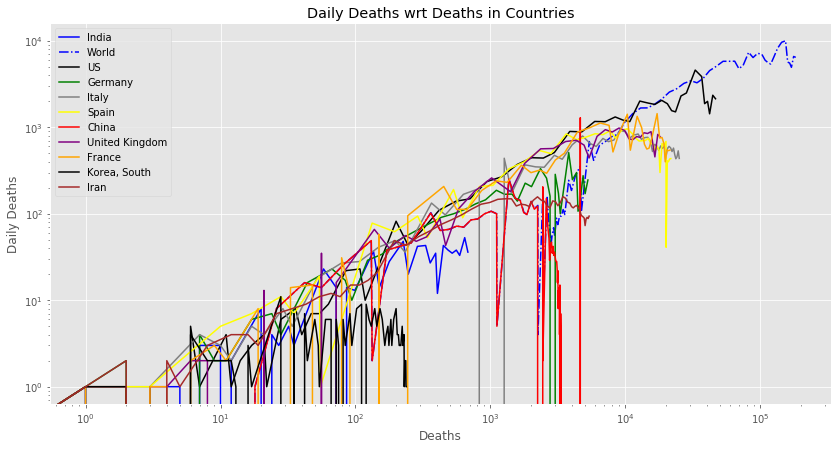

In [56]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')